**Problem Statements:**
        
        
  A fitness equipment company, wants to understand its treadmill customers better. They want to figure out what kind of people buy each type of treadmill they sell: KP281, KP481, and KP781. Their main goal is to give new customers good advice on which treadmill to choose, based on their needs. To do this, they're looking into whether different types of customers prefer different treadmills. By learning more about their customers, they can make better recommendations, advertise more effectively, and make sure their treadmills fit what people want. Ultimately, this will make customers happier and help the company grow.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/aerofit_treadmill.txt")

In [59]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [60]:
df.shape

(180, 9)

There are 180 rows and 9 features are available in the dataset

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Comments on the Range of Attributes:

* Marital Status: The dataset includes both single and partnered customers, indicating a diverse customer base.
* Age: Customer ages vary, suggesting that the company serves age range from 28 to 50.
* Product Purchased: The company offers three treadmill products (KP281, KP481, KP781) at different price points, catering to various customer preferences.
* Usage column corresponds to the no.of days a customer is using the treadmill in a week.
* Fitness column refers to the shape of the customer where 5 – good fitness, 1-poor fitness.
* Miles column refers to average no.of miles a customer wishes to walk/run on the treadmill.

# Missing Values

In [62]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There is no missing values and datatype object can be converted into categorical

In [63]:
df["Product"] = df["Product"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["MaritalStatus"] = df["MaritalStatus"].astype("category")


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [65]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# Check the outlier of all the numerical features

In [66]:
num_features = df.select_dtypes(include="number").columns

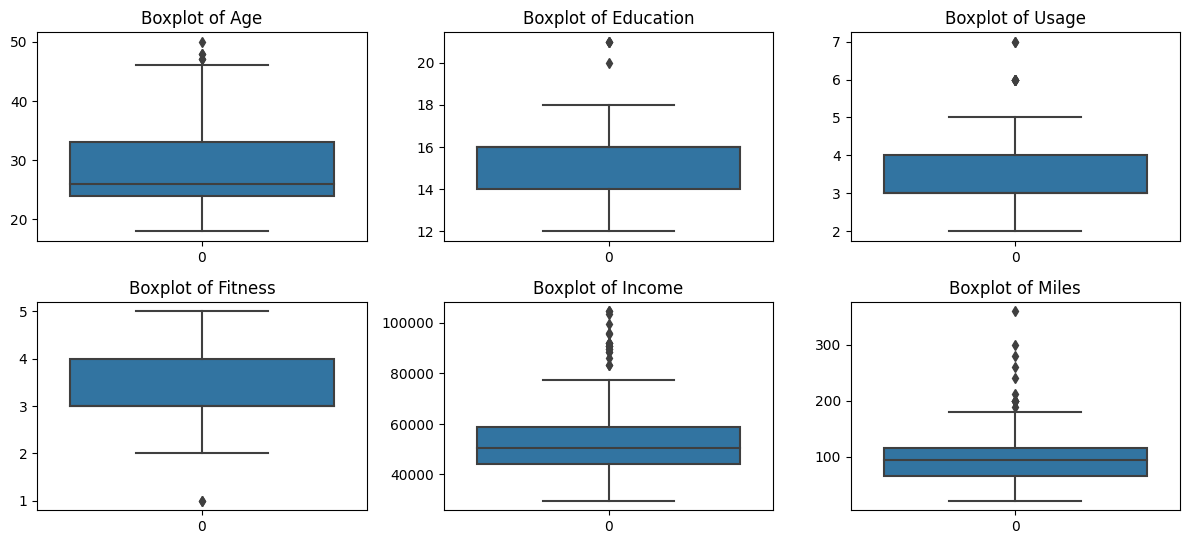

In [67]:
plt.figure(figsize=(12, 8))
for i,feature in enumerate(num_features):
  plt.subplot(3,3,i+1)
  sns.boxplot(data=df[feature])
  plt.title(f"Boxplot of {feature}")
plt.tight_layout()

* Even though it seems like outlier in the box plot, the range is acceptable for the corresponding features

# Unique attributes of features - Non Graphical Analysis

Unquie Attributes of MartialStatus

In [68]:

# Value counts of MaritalStatus
marital_status_counts = df['MaritalStatus'].value_counts()
print("Value counts of MaritalStatus:")
print(marital_status_counts)

Value counts of MaritalStatus:
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


Unquie Attributes of Product

In [69]:
# Value counts of Product
Product_status_counts = df['Product'].value_counts()
print("Value counts of Product:")
print(Product_status_counts)

Value counts of Product:
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


Unquie Attributes of Gender

In [70]:

# Value counts of Gender
Gender_status_counts = df['Gender'].value_counts()
print("Value counts of Gender:")
print(Gender_status_counts)

Value counts of Gender:
Male      104
Female     76
Name: Gender, dtype: int64


In [71]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [72]:
df.groupby("MaritalStatus")["Fitness"].value_counts()

MaritalStatus  Fitness
Partnered      3          57
               2          18
               5          18
               4          13
               1           1
Single         3          40
               5          13
               4          11
               2           8
               1           1
Name: Fitness, dtype: int64

# Univariate Analysis

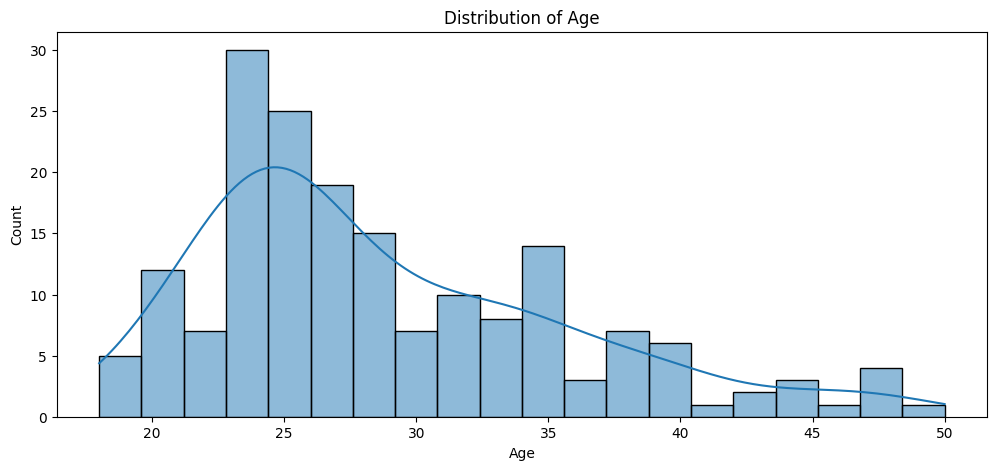

In [73]:
# Univariate Analysis for Continuous Variable (Age)
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x="Age", bins=20, kde=True)
plt.title("Distribution of Age")
plt.show()

It is shown that most of the people using treadmills are around the age 22 to 30

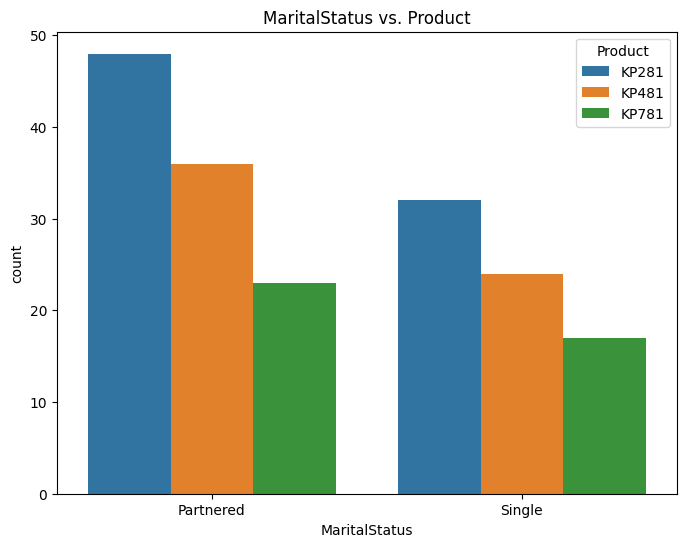

In [74]:
# Bivariate Analysis for Categorical Variable (MaritalStatus) and Product Purchased
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="MaritalStatus", hue="Product")
plt.title("MaritalStatus vs. Product")
plt.show()

Observation:
* Married People are using the treadmills more

* More people are buying the product KP281 which is less expensive

# Bivariate Analysis

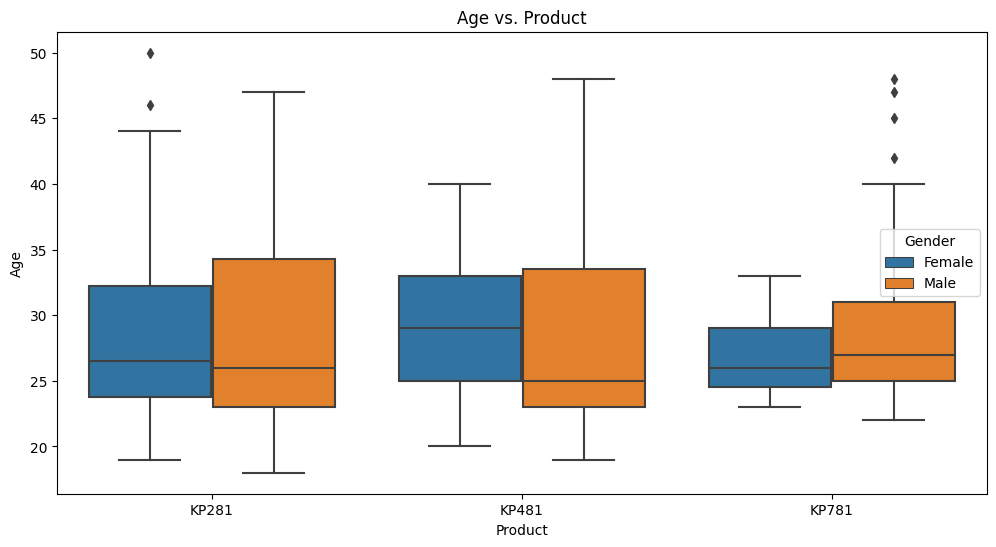

In [110]:
# Bivariate Analysis for Continuous Variable (Age) and Product
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Product", y="Age",hue = "Gender")
plt.title("Age vs. Product")
plt.show()

<Axes: xlabel='Gender', ylabel='Income'>

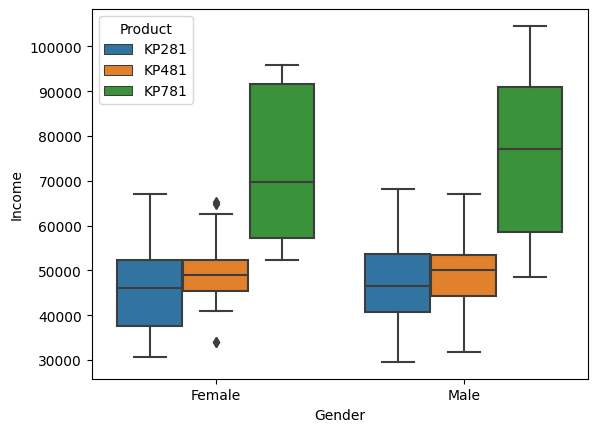

In [111]:
sns.boxplot(data=df, x="Gender", y="Income",hue = "Product")

Observation:

High variant Product KP781 is bought by high income customers

<ipython-input-76-8052226dfaf0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


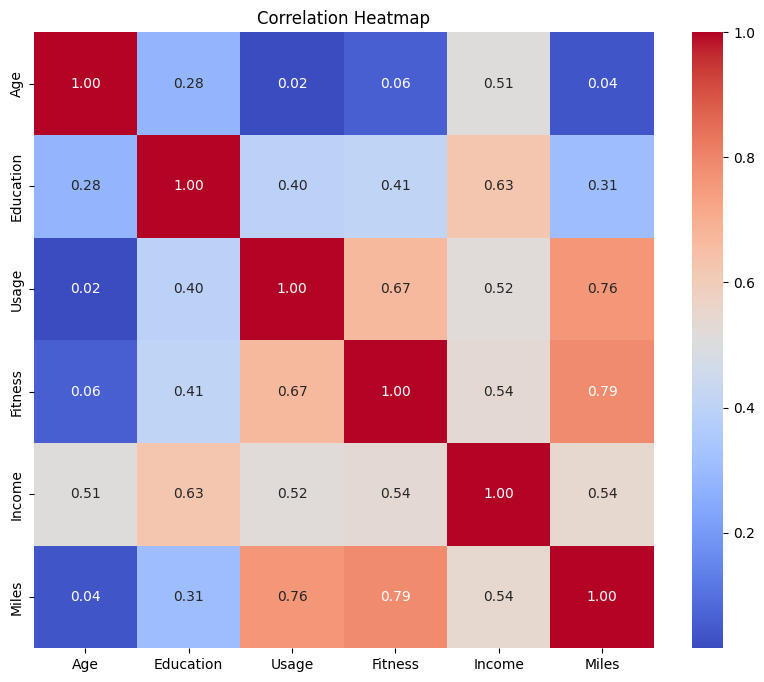

In [76]:
# Correlation Analysis (Heatmap)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Observation:

* Miles and Usage, Miles and Fitness has high correlations. People who has good fitness walks more miles every week and usage of treadmills is also more

* When Education and age is more, income is also more.

* People who has more income also more foscussed on their fitness

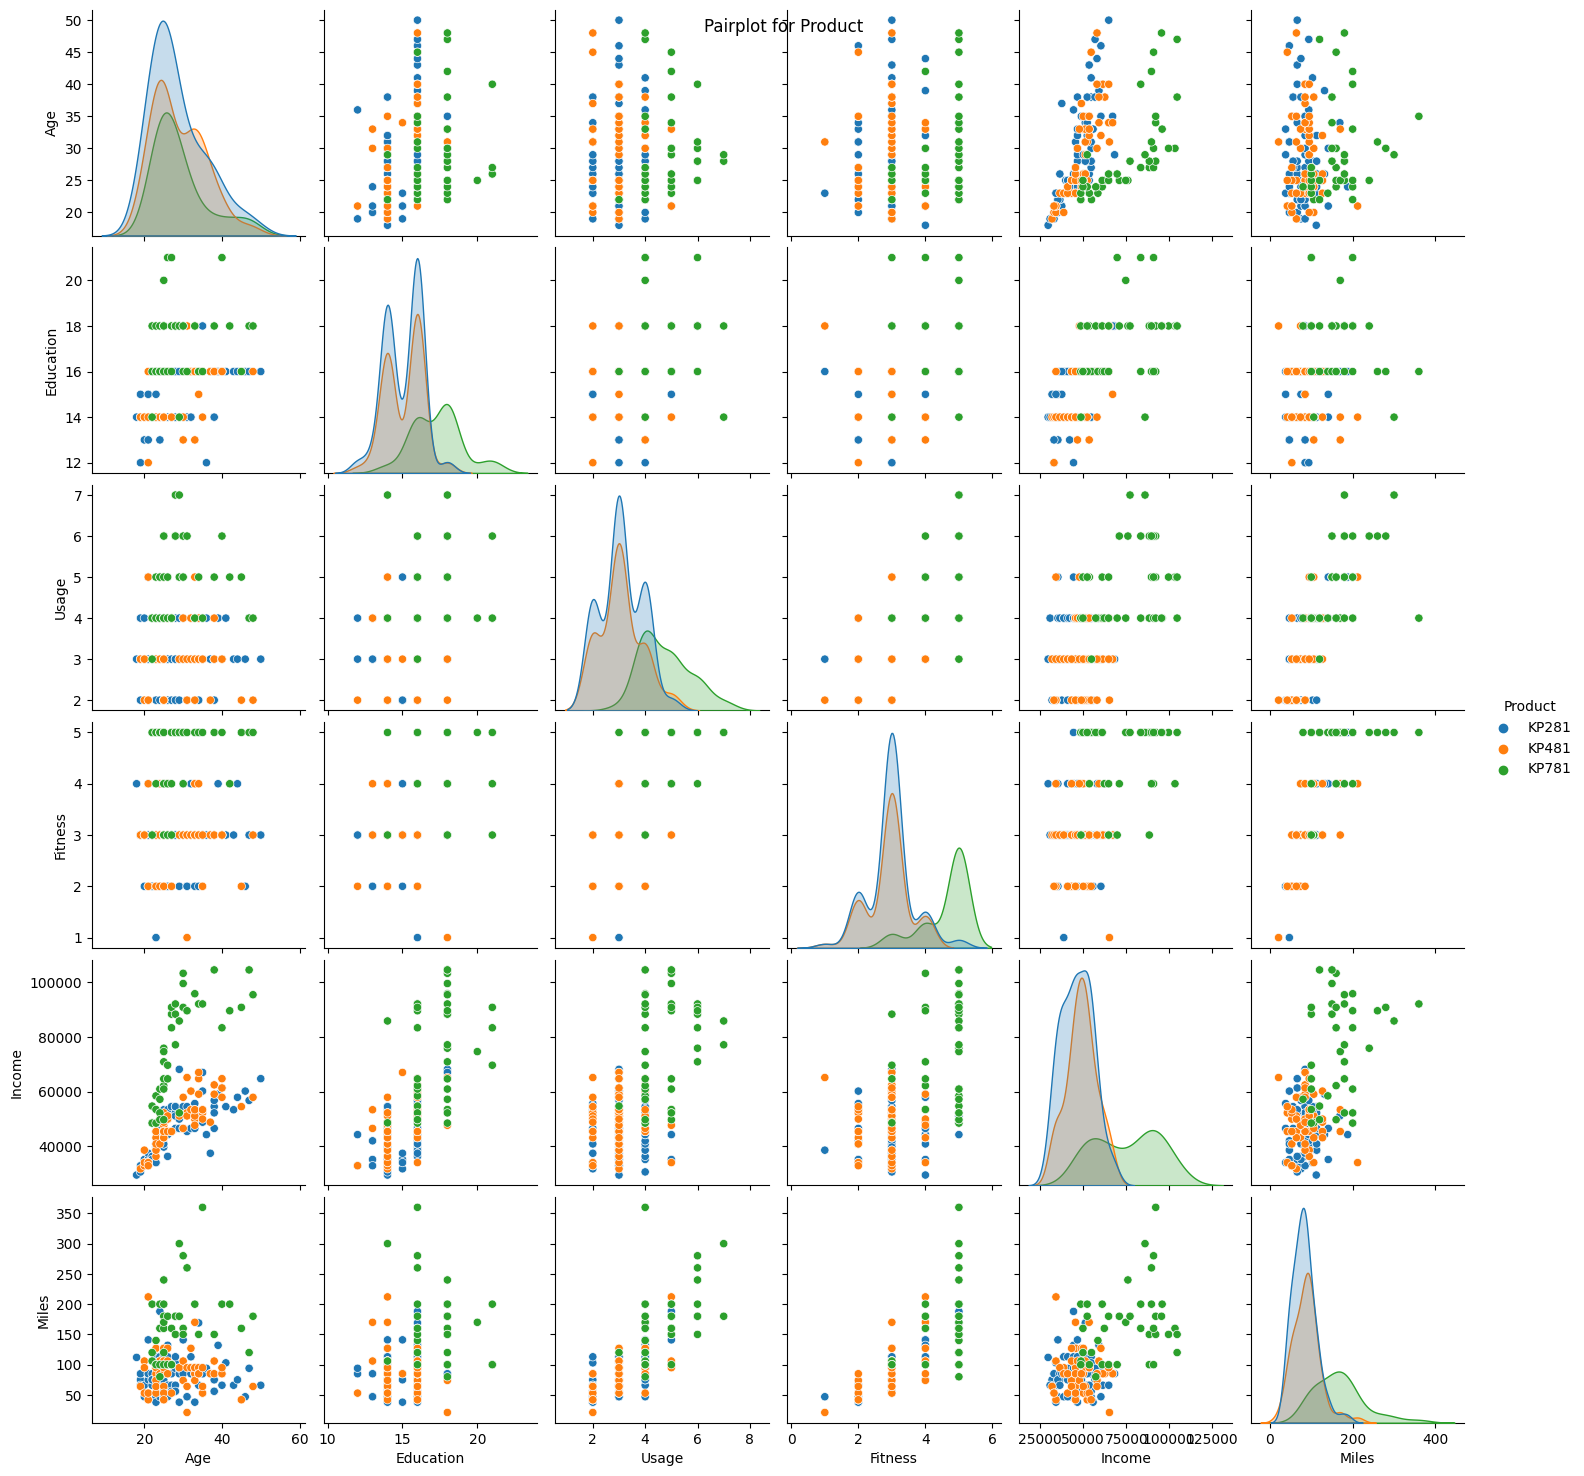

In [77]:
# Correlation Analysis (Pairplot)
sns.pairplot(df, hue="Product", diag_kind="kde")
plt.suptitle("Pairplot for Product")
plt.show()

# Marginal, Joint and Conditional probability


# How the sales of different types of product depends on the gender of the customers?

In [78]:
pd.crosstab(index=df["Gender"], columns=  df["Product"], margins = True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


 What is the Probability of female buying all the products? (Marginal Probaility)

In [79]:
round(76/180*100)

42

 What is the Probability of buying KP481?

In [80]:
round(60/180*100)

33

Out of 100 products sold for KP281, how many are being bought by males? - 50 products (Conditional Probability)

In [81]:
pd.crosstab(index= df["Gender"],columns = df["Product"],margins = True, normalize = "columns")*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,50.0,48.333333,17.5,42.222222
Male,50.0,51.666667,82.5,57.777778


Out of 100 products sold for KP781, how many are being bought by females? - 18 products

Which product is famous among females? - KP281 - 52.63%

What is the probability of a male customer buying a KP781 treadmill? - 31.73

In [82]:
pd.crosstab(index= df["Gender"],columns = df["Product"],margins = True, normalize = "index")*100

Product,KP281,KP481,KP781
Gender,,,
Female,52.631579,38.157895,9.210526
Male,38.461538,29.807692,31.730769
All,44.444444,33.333333,22.222222


Out of total sales happening, female buying KP281 -22.22% (Joint Probability)

In [83]:
pd.crosstab(index= df["Gender"],columns = df["Product"],margins = True, normalize =True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [84]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# How the sales of different types of product depends on the income of the customers?

Create a salary bucket of the customer

In [92]:
bins = [29000,50000,70000,90000,110000]
labels = ["30K-50K","50K-70K","70K-90K","90K-110K"]
df["salary_bucket"] = pd.cut(x = df["Income"],bins = bins, labels = labels)


In [98]:
pd.crosstab(index = df["salary_bucket"],columns= df["Product"], margins = True)

Product,KP281,KP481,KP781,All
salary_bucket,,,,
30K-50K,48,30,5,83
50K-70K,32,30,12,74
70K-90K,0,0,11,11
90K-110K,0,0,12,12
All,80,60,40,180


In [108]:
#probablity of people with the corresponding salary buckets buying a particular model
pd.crosstab(index = df["salary_bucket"],columns= df["Product"], margins=True, normalize= True)*100

Product,KP281,KP481,KP781,All
salary_bucket,,,,
30K-50K,26.666667,16.666667,2.777778,46.111111
50K-70K,17.777778,16.666667,6.666667,41.111111
70K-90K,0.000000,0.000000,6.111111,6.111111
90K-110K,0.000000,0.000000,6.666667,6.666667
All,44.444444,33.333333,22.222222,100.000000


# How the sales of different types of product depends on the age of the customers?

Create Age Bucket

In [101]:
bins = [18,30,40,50]
labels = ["18-30","30-40","40-50"]
df["Age_bucket"] = pd.cut(x = df["Age"],labels = labels, bins = bins)

In [109]:
#probablity of people with the corresponding age buckets buying a particular model
pd.crosstab(index=df["Age_bucket"],columns = df["Product"],margins=True,normalize =True)*100

Product,KP281,KP481,KP781,All
Age_bucket,,,,
18-30,30.167598,19.553073,16.759777,66.480447
30-40,10.614525,12.849162,3.351955,26.815642
40-50,3.351955,1.117318,2.234637,6.703911
All,44.134078,33.519553,22.346369,100.000000


Recommendations:

* Customers earning less than $50,000:

These individuals purchase purchase more treadmill, particularly favoring the KP281 model. So recommending the KP281 model is advisable for increased sales success.

* Customers earning between $50,000 and $70,000:

Customers falling within this income range display a moderate likelihood of treadmill purchase. Additionally, they demonstrate an equal probability of choosing either the KP281 or KP481 model. Recommending both models to this customer segment is appropriate, and the implementation of special offers or campaigns may significantly boost sales.

* Customers earning more than $70,000:

Individuals with incomes exceeding $70,000 are exclusively opting for the KP781 model. Therefore, recommending this particular model is highly advisable for customers within this income bracket.


*Fitness Levels:

Customers with fitness levels 1, 2, and 3 exhibit the highest likelihood of purchasing the KP281 model and a moderate likelihood of opting for the KP481 model. Recommending these two models to customers with these fitness levels is recommended.

Customers with a fitness level of 5 are most inclined to purchase the KP781 model. Thus, recommending this model to individuals with fitness level 5 is a strategic approach.